In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Loading Boston House Pricing Dataset

In [50]:
from sklearn.datasets import load_boston

In [51]:
boston= load_boston()

In [52]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [53]:
# Checking the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


### Preparing the Dataset

In [55]:
# Independent (input) features
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)

In [56]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
# Incorporating the output feature
dataset['Price'] = boston.target

In [58]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [60]:
# Summarizing Stats of the Data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [61]:
# Check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Exploratory Data Analysis

In [62]:
# Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

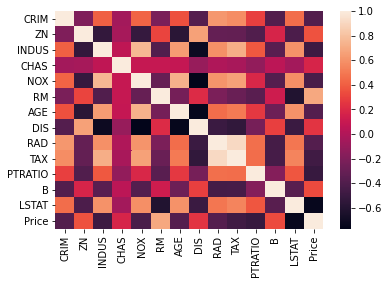

In [63]:
# Correlation heatmap
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix)

In [64]:
sns.pairplot(dataset)

Text(0, 0.5, 'House Price')

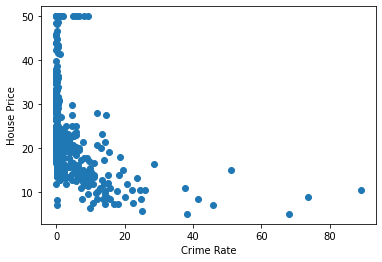

In [ ]:
# Scatter plot of Price Vs CRIM
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('House Price')

Observation:
        
        The Price of houses are inversely proportional to the Crime Rate
        As the Crime rate increases, the price of houses reduces.

Text(0, 0.5, 'House Price')

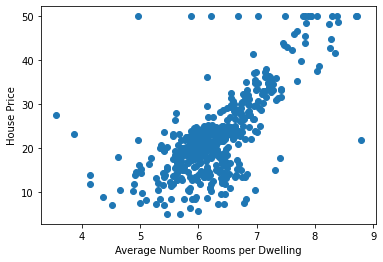

In [ ]:
# Scatter plot of Price Vs RM
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('Average Number Rooms per Dwelling')
plt.ylabel('House Price')

Observation:

    As the number of houses increases, so does the price of houses.

<AxesSubplot:xlabel='RM', ylabel='Price'>

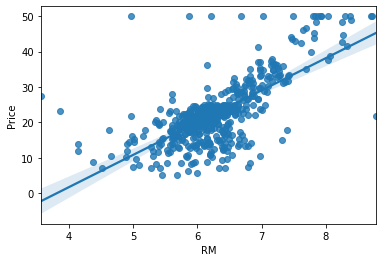

In [ ]:
sns.regplot(x='RM', y='Price', data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

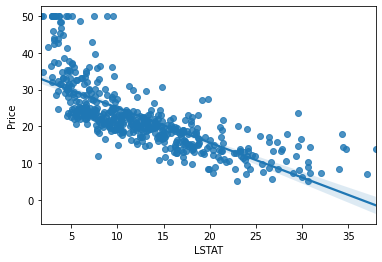

In [ ]:
sns.regplot(x='LSTAT', y='Price', data=dataset)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

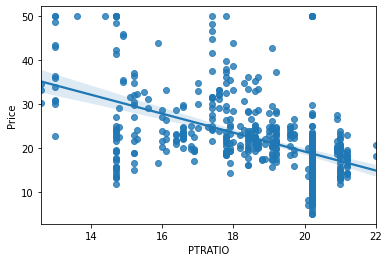

In [ ]:
sns.regplot(x='PTRATIO', y='Price', data=dataset)

Observation:
    
    As the % of lower status of population increases, the price of houses decreases.

Independent and Depentend Features

In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=23)

In [ ]:
x_train.shape

(354, 13)

In [ ]:
x_test.shape

(152, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [ ]:
x_train

array([[ 0.26737899, -0.50755975,  1.04003284, ...,  0.79415163,
         0.38217473, -0.67802588],
       [-0.39675753, -0.50755975, -1.19390065, ..., -0.24514477,
         0.42418163, -1.17457677],
       [-0.40596476,  0.37464721, -0.79000077, ..., -0.81203372,
         0.3920458 , -0.44030039],
       ...,
       [-0.40712725,  2.64317941, -1.18508829, ..., -0.10342254,
         0.41014277, -1.48826189],
       [-0.34728977, -0.50755975, -0.70775207, ..., -0.52858925,
         0.22072785, -0.12802193],
       [-0.40689903,  0.54268664, -0.90456146, ...,  0.22726268,
         0.35552283, -0.71037906]])

In [ ]:
x_test

array([[-0.40277325, -0.50755975, -1.02352834, ..., -0.90651522,
         0.38392959, -0.34464753],
       [-0.31716836, -0.50755975, -0.16432315, ..., -0.05618179,
         0.42418163, -0.925598  ],
       [-0.40601587,  0.6687162 ,  0.59060244, ..., -0.15066328,
         0.42418163, -0.27712786],
       ...,
       [ 1.39290754, -0.50755975,  1.04003284, ...,  0.79415163,
        -3.8267411 ,  1.95383447],
       [-0.40671598,  0.33263736, -1.12927667, ..., -1.70960789,
         0.37296173, -1.1211237 ],
       [-0.31302594,  0.33263736, -1.03527815, ..., -2.60718206,
         0.38601348, -0.18428832]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Print the coefficients
print(lr.coef_)

[-0.78592547  1.03079175 -0.15334333  0.90198036 -1.87799255  2.85764693
  0.02068298 -2.9363924   2.1915314  -1.25122187 -1.80023822  1.33890124
 -3.76674931]


Observation:

    With a unit increase in CRIM (Per Capita Crime Rate), there is 0.78592547 decrease in the Price.

In [ ]:
# Print Intercept
print(lr.intercept_)

22.5635593220339


In [ ]:
# On which parameters has the model trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
# Prediction with Test Data
pred = lr.predict(x_test)


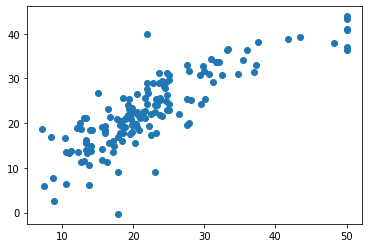

In [ ]:
# Plot a scatter plot of the prediction'
plt.scatter(y_test, pred)

Observation: The model has a good prediction since the plotting has a linear pattern

In [ ]:
# Error
residue = y_test - pred
residue

176   -2.288826
311   -4.753833
94    -5.901137
139    0.968845
232    2.794518
         ...   
213    3.000592
373    7.608322
437    1.062976
281    1.304183
263   -3.437534
Name: Price, Length: 152, dtype: float64

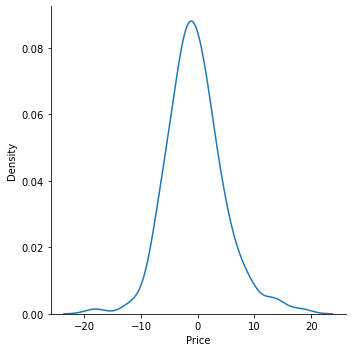

In [ ]:
# Plot the residues
sns.displot(residue, kind='kde')

Observation:
        The model is performing well since the residues are normally distributed.

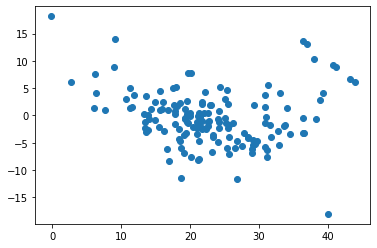

In [ ]:
# Scatter plot in respect to prediction and residues
plt.scatter(pred, residue)

Observation: The distribution is uniform.

In [ ]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error)

print('Mean Squared Error:',         mean_squared_error(y_test, pred))
print('Mean Absolute Error:',        mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',    np.sqrt(mean_squared_error(y_test, pred)))


Mean Squared Error: 25.35857719400701
Mean Absolute Error: 3.7824295112050272
Root Mean Squared Error: 5.035730055712579


### R Square and Adjusted R Square

Formula

### R^2 = 1 - SSR/TSS

R^2 = Coefficient of determination, SSR = Sum of Squares of Residuals, SST = Total Sum of Squares

### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

Where:

R2: The R2 of the model 
n: The number of observations 
k: The number pf predictor variables

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
score

0.6947991644651345

This is good enough since the more the score is towards one the better.

In [ ]:
# Display Adjusted R squared
1 - ((1-score)*(len(y_test)-1)/len(y_test-x_test.shape[1]-1))

0.6968070646989164

## New Data Prediction

In [ ]:
boston.data[0].reshape(1,-1).shape

(1, 13)

In [ ]:
s.transform(boston.data[0].reshape(1,-1))

array([[-0.41036868,  0.24861765, -1.2790868 , -0.29306922, -0.08655767,
         0.45212216, -0.05547093,  0.06818544, -0.96633418, -0.65034983,
        -1.52064491,  0.42418163, -1.06626397]])

In [ ]:
lr.predict(s.transform(boston.data[0].reshape(1,-1)))

array([30.34513162])

## Pickling The Model file for Deployment 

In [ ]:
import pickle

In [ ]:
# Writing a pickle file with the Model
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [ ]:
#Loading the Pickled Model file
pkl_model = pickle.load(open('regmodel.pkl','rb'))